# Mini-Project 2: Data Preprocessing For Wine Quality Analysis

Using the Wine Quality dataset, explore the following questions:
- How do different chemical properties correlate with the quality of wine?
- Is there a significant difference in quality between red and white wines?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()  # Make sure you have properly set up your Kaggle API credentials

# Download the dataset
api.dataset_download_files("ruthgn/wine-quality-data-set-red-white-wine", path=".", unzip=True)

# List the files in the current directory
files = os.listdir()

# Now you can directly access the dataset files without saving them to a specific folder
for file in files:
    if file.endswith('.csv'):
        print(f"Found CSV file: {file}")
        # Here you can perform further operations with the CSV file


Found CSV file: wine-quality-white-and-red.csv


In [3]:
df = pd.read_csv("wine-quality-white-and-red.csv")

In [4]:
df_wines= df.copy()

In [5]:
df_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
for i in df_wines.keys():
    print(f"{i} has {len(np.unique(df_wines[i]))} unique values")

type has 2 unique values
fixed acidity has 106 unique values
volatile acidity has 187 unique values
citric acid has 89 unique values
residual sugar has 316 unique values
chlorides has 214 unique values
free sulfur dioxide has 135 unique values
total sulfur dioxide has 276 unique values
density has 998 unique values
pH has 108 unique values
sulphates has 111 unique values
alcohol has 111 unique values
quality has 7 unique values


In [7]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


C:\Users\kyana\AppData\Local\Temp\ipykernel_4328\1515612813.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


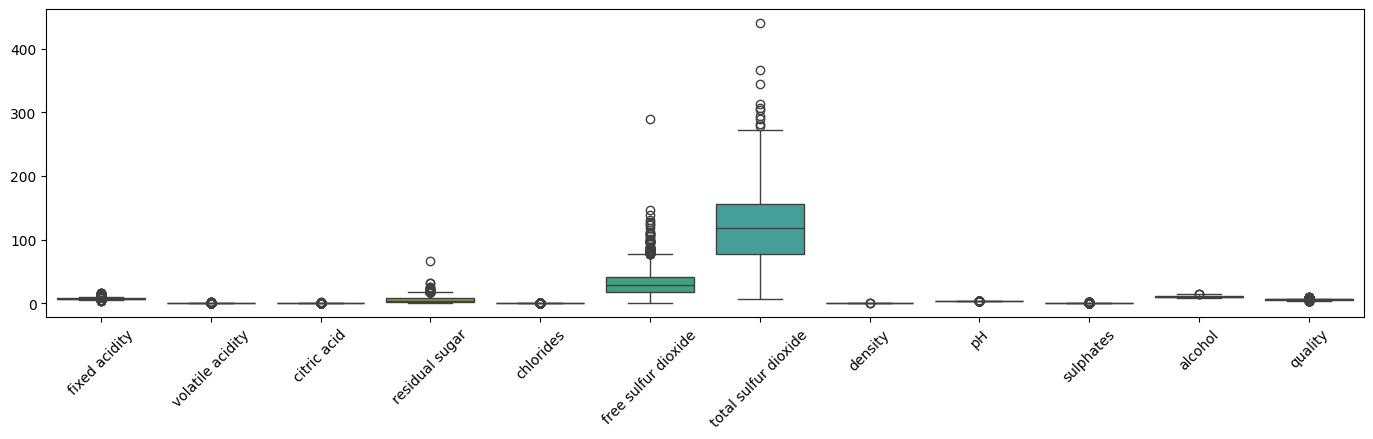

In [8]:
fig,ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=df_wines)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()